In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
pd.set_option('display.max_columns', 250)

df = pd.read_csv('./datasets/clean_train.csv')

df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y
0,109,533352170,60,RL,68.0,13517,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,6,8,1976,2005,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,3,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,1976.0,2.0,475.0,TA,3,0,44,0,0,0,0,0,3,2010,WD,130500,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
1,544,531379050,60,RL,43.0,11492,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,7,5,1996,1997,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,4,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,1997.0,2.0,559.0,TA,3,0,74,0,0,0,0,0,4,2009,WD,220000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
2,153,535304180,20,RL,68.0,7922,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,5,7,1953,2007,CompShg,VinylSd,VinylSd,None,0.0,3,4,3,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,1953.0,1.0,246.0,TA,3,0,52,0,0,0,0,0,1,2010,WD,109000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,318,916386060,60,RL,73.0,9802,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,5,5,2006,2007,CompShg,VinylSd,VinylSd,None,0.0,3,3,4,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,2007.0,2.0,400.0,TA,3,100,0,0,0,0,0,0,4,2010,WD,174000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,255,906425045,50,RL,82.0,14235,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,6,8,1900,1993,CompShg,Wd Sdng,Plywood,None,0.0,3,3,2,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,1957.0,2.0,484.0,TA,3,0,59,0,0,0,0,0,3,2010,WD,138500,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [24]:
df = pd.get_dummies(df, columns=['ms_subclass', 'ms_zoning', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
                                 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'roof_matl', 'exterior_1st',
                                 'exterior_2nd', 'mas_vnr_type', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2',
                                 'heating', 'electrical', 'functional', 'sale_type',])

In [25]:
def ordinal_values(ordinal_cell):
    if ordinal_cell == 'NA':
        return 0
    elif ordinal_cell == 'Po':
        return 1
    elif ordinal_cell == 'Fa':
        return 2
    elif ordinal_cell == 'TA':
        return 3
    elif ordinal_cell == 'Gd':
        return 4
    else:
        return 5

In [26]:
df['bsmt_cond'] = df['bsmt_cond'].map(ordinal_values)
df['heating_qc'] = df['heating_qc'].map(ordinal_values)
df['kitchen_qual'] = df['kitchen_qual'].map(ordinal_values)
df['garage_qual'] = df['garage_qual'].map(ordinal_values)

In [27]:
df.head()

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Gtl,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,mas_vnr_type_Unknwn,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,functional_Maj1,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_

---

In [28]:
features = [col for col in df._get_numeric_data().columns if col not in ['id', 'pid', 'saleprice']]
X = df[features]
y = df['saleprice']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# Model and scores without PCA

# Instantiate and fit a linear regression model.
lr = LinearRegression()
lr.fit(X_train, y_train)


# Score on training set.
print(f'Training Score: {round(lr.score(X_train, y_train),4)}.')

# Score on testing set.
print(f'Testing Score: {round(lr.score(X_test, y_test),4)}.')

# Cross-validation score
print(f'Cross-val Score: {round(cross_val_score(lr, X_train, y_train).mean(), 4)}.')

Training Score: 0.939.
Testing Score: 0.907.
Cross-val Score: 0.9018.


---

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [33]:
pca = PCA()
Z_train = pca.fit(X_train_sc)

# Instantiate linear regression model.
lm = LinearRegression()

# Transform Z_train and Z_test.
Z_train = pca.transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

# Fit on Z_train.
lm.fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(lm.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(lm.score(Z_test, y_test),4)}')

Training Score: 0.939
Testing Score: -1.9834108378410625e+20


In [34]:
pd.DataFrame(Z_train).cov().round().head(60)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246
0,16.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
1,0.0,8.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
2,-0.0,-0.0,6.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0

In [35]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 150 components): {var_exp[:150]}')

print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance (first 150 components): {cum_var_exp[:150]}')

Explained variance (first 150 components): [0.06577629 0.03143598 0.02446014 0.02105389 0.02055164 0.01864362
 0.01570319 0.01507165 0.01376301 0.01265291 0.01238084 0.01212038
 0.01166352 0.011359   0.01102702 0.01081578 0.01033948 0.00999323
 0.00983391 0.00955024 0.00932428 0.00913889 0.00890872 0.00884616
 0.00871523 0.00863137 0.00841936 0.00830353 0.00817397 0.00806739
 0.00797851 0.00774545 0.00766993 0.00751323 0.00739521 0.00727842
 0.00719231 0.00715074 0.00701078 0.00695424 0.00687508 0.00682093
 0.00668658 0.00657779 0.00637754 0.00629992 0.00621081 0.00617063
 0.00612599 0.00610067 0.00600861 0.00590086 0.00578084 0.0057198
 0.00567272 0.00562532 0.00555693 0.00542922 0.00540382 0.00534032
 0.00528615 0.00521632 0.00514626 0.00506686 0.00505654 0.00497168
 0.00492038 0.0048656  0.00483912 0.00480029 0.0047845  0.00473183
 0.0046577  0.00463212 0.00461413 0.00456158 0.00451447 0.00448193
 0.0044211  0.00439453 0.0043194  0.0043059  0.0042562  0.00424906
 0.0042155  0.004192

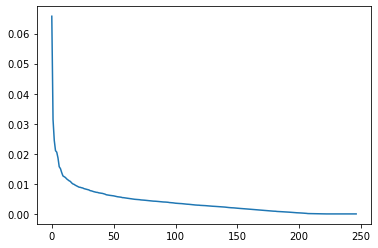

In [39]:
plt.plot(var_exp)

---

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('pca', PCA()),
    ('model', LinearRegression())
])

params = {
    'pca__n_components': range(1, X.shape[1] + 1)
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9071611262781547


{'pca__n_components': 203}